In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
import pandas as pd

In [68]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['tmp'] = data.target
df.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,tmp
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [69]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.model_selection import GridSearchCV

knn_regressor = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Разные значения количества соседей
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Разные метрики расстояния
}
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Наилучшие параметры для KNeighborsRegressor:", best_params)

Наилучшие параметры для KNeighborsRegressor: {'metric': 'euclidean', 'n_neighbors': 9}


In [106]:
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
best_knn_regressor.fit(X_train, y_train)

y_pred = best_knn_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели KNeighborsRegressor с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

residuals = y_test - y_pred



Оценка точности модели KNeighborsRegressor с наилучшими параметрами:
Коэффициент детерминации (R^2): 0.41811079656983197


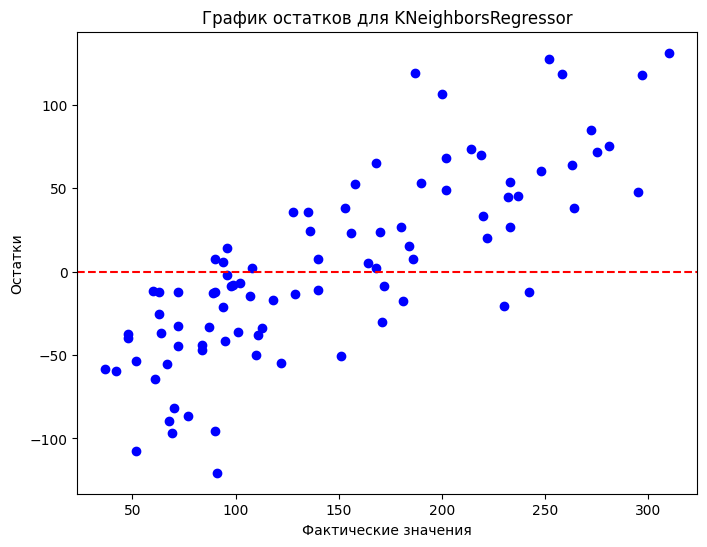

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='b', marker='o')
plt.xlabel("Фактические значения")
plt.ylabel("Остатки")
plt.title("График остатков для KNeighborsRegressor")
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели LinearRegression:")
print(f"Коэффициент детерминации (R^2): {r2}")

Оценка точности модели LinearRegression:
Коэффициент детерминации (R^2): 0.4526027629719197


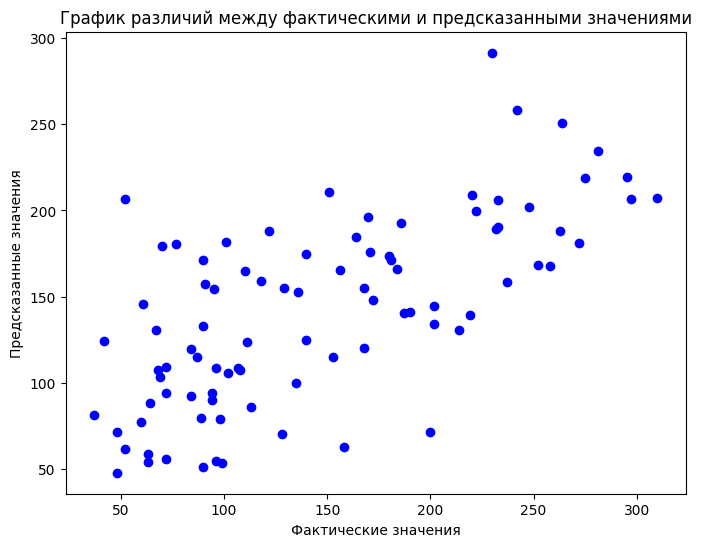

In [74]:
y_pred = linear_regressor.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', marker='o')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("График различий между фактическими и предсказанными значениями")
plt.show()

In [89]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_regressor = Ridge()

grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

best_ridge_regressor = Ridge(alpha=best_params['alpha'])
best_ridge_regressor.fit(X_train, y_train)

y_pred = best_ridge_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели Ridge с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

Оценка точности модели Ridge с наилучшими параметрами:
Коэффициент детерминации (R^2): 0.46085219464119254


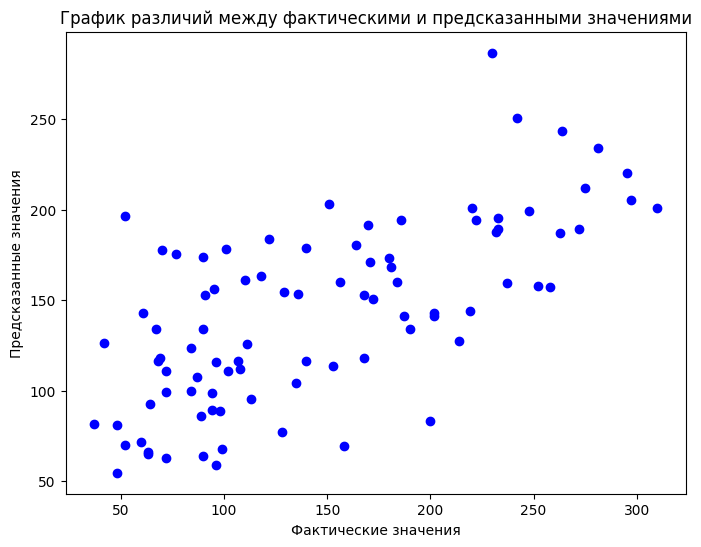

In [76]:
y_pred = best_ridge_regressor.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', marker='o')
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("График различий между фактическими и предсказанными значениями")
plt.show()

In [92]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_regressor = Lasso()

grid_search = GridSearchCV(lasso_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_lasso_regressor = Lasso(alpha=best_params['alpha'])
best_lasso_regressor.fit(X_train, y_train)

y_pred = best_lasso_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели Lasso с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

Оценка точности модели Lasso с наилучшими параметрами:
Коэффициент детерминации (R^2): 0.4718547867276227


In [ ]:
plt.plot(lasso.coef_, 's', label="Nacco alpha=1")
plt.plot(lasso001.coef_, '*', label="Nacco alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Nacco alpha=0.0001")
plt.plot(ridged1.coef_, 'o', lLabel="Tpehesan perpeccua alpha=0.1")
plt.legend(ncol=2, Loc=(®, 1.05))

[IST ET ICP]

plt.xlabel("Unnekc KoshonuneHTa")

plt.ylabel("Ouenka Kkosh6nuneHTta")

In [93]:
LR_clf = LogisticRegression().fit(X_train, y_train)
print(LR_clf.score(X_train, y_train))

0.028328611898016998


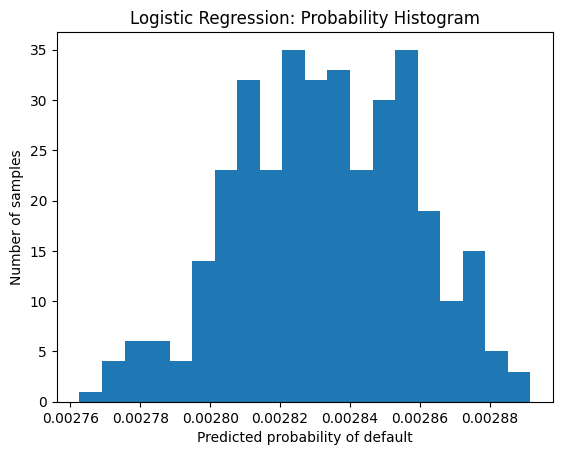

In [94]:
y_pred_prob = LR_clf.predict_proba(X_train)[:, 1]

plt.hist(y_pred_prob, bins=20)
plt.xlabel('Predicted probability of default')
plt.ylabel('Number of samples')
plt.title('Logistic Regression: Probability Histogram')
plt.show()